# Preparing

## Importing Required Libraries

In [84]:
# import library used for data processing
import pandas as pd
pd.set_option('display.max_columns', None) # to remove the limit of columns shows as output
import numpy as np
import datetime as dt
import copy
from IPython.display import display

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [85]:
# customer data
dim_customers = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/raw_data/dim_customers.csv", encoding='ISO-8859-1')
# product data
dim_products = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/raw_data/dim_products.csv", encoding='ISO-8859-1')
# gross price data
fact_gross_price = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/raw_data/fact_gross_price.csv", encoding='ISO-8859-1')
# manufacturing cost data
fact_manufacturing_cost = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/raw_data/fact_manufacturing_cost.csv", encoding='ISO-8859-1')
# discount data
fact_pre_invoice_deduction = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/raw_data/fact_pre_invoice_deduction.csv", encoding='ISO-8859-1')
# sales data
fact_sales_monthly = pd.read_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/raw_data/fact_sales_monthly.csv", encoding='ISO-8859-1')

## Data Understanding

### Customer Data
Column Description for dim_customer table:
1. customer_code: The 'customer_code' column features unique identification codes for every customer in the dataset. These codes can be used to track a customer's sales history, demographic information, and other relevant details. For example, the codes could look like '70002017', '90005160', and '80007195' respectively.

2. customer: The 'customer' column lists the names of customers, for example 'Atliq Exclusive', 'Flipkart', and 'Surface Stores' etc.

3. platform: The 'platform' column identifies the means by which a company's products or services are sold. "Brick & Mortar" represents the physical store/location, and "E-Commerce" represents online platforms.

4. channel: The 'channel' column reflects the distribution methods used to sell a product. These methods include "Retailers", "Direct", and "Distributors". Retailers refer to physical or online stores that sell products to consumers. Direct sales refer to sales made directly to consumers through a company's website or other direct means, and distributors refer to intermediaries or middlemen between the manufacturer and retailer or end consumers.

5. market: The 'market' column lists the countries in which the customer is located.

6. region: The 'region' column categorizes countries according to their geographic location, including "APAC" (Asia Pacific), "EU" (Europe), "NA" (North America), and "LATAM" (Latin America).

7. sub_zone: "The 'sub_zone' column further breaks down the regions into sub-regions, such as "India", "ROA" (Rest of Asia), "ANZ" (Australia and New Zealand), "SE" (Southeast Asia), "NE" (Northeast Asia), "NA" (North America), and "LATAM" (Latin America)."

In [86]:
# top records
dim_customers.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [87]:
# last records
dim_customers.tail()

,customer_code,customer,platform,channel,market,sub_zone,region
204,90024183,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,LATAM,LATAM
205,90024184,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM
206,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,LATAM,LATAM
207,90026205,Amazon,E-Commerce,Retailer,Mexico,LATAM,LATAM
208,90027207,Amazon,E-Commerce,Retailer,Brazil,LATAM,LATAM


In [88]:
# check data shape
print(f"Shape of the Customers Data {dim_customers.shape}")

Shape of the Customers Data (209, 7)


In [89]:
# check the data type of all columns and non values present in each
dim_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       183 non-null    object
 6   region         183 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [90]:
# duplication check
dim_customers[dim_customers.duplicated()]

,customer_code,customer,platform,channel,market,sub_zone,region


In [91]:
# number unique value in each column
dim_customers.nunique()

customer_code    209
customer          75
platform           2
channel            3
market            27
sub_zone           6
region             3
dtype: int64

#### Check unique value in columns

In [92]:
# Check unique values ​​in customer column
dim_customers['customer'].unique()

array(['Atliq Exclusive', 'Atliq e Store', 'Neptune', 'Synthetic',
       'Novus', 'Sage', 'Leader', 'Zone', 'Taobao', 'Reliance Digital',
       'Croma', 'Ezone', 'Vijay Sales', 'Lotus', 'Viveks', 'Girias',
       'Amazon', 'Flipkart', 'Ebay', 'Electricalsocity',
       'Electricalslytical', 'Expression', 'Propel', 'Amazon ',
       'Acclaimed Stores', 'Info Stores', 'Flawless Stores',
       'Electricalsbea Stores', 'All-Out', 'Surface Stores',
       'Nomad Stores', 'Insight', 'Digimarket', 'Forward Stores', 'Sound',
       'Epic Stores', 'Logic Stores', 'Path', 'Control', 'Elite',
       'Chip 7', 'Elkjøp', 'UniEuro', 'Media Markt', 'Sorefoz', 'Otto',
       'Notebillig', 'Billa', 'Saturn', 'Expert',
       'Currys (Dixons Carphone)', 'Fnac-Darty', 'Unity Stores',
       'Euronics', "Argos (Sainsbury's)", 'Coolblue', 'Boulanger',
       'Radio Popular', 'Electricalslance Stores', 'Mbit', 'Chiptec',
       'Electricalsara Stores', 'Power', 'Premium Stores',
       'Integration Store

In [93]:
# Check unique values ​​in platform column
dim_customers['platform'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [94]:
# # Check unique values ​​in channel column
dim_customers['channel'].unique()

array(['Direct', 'Distributor', 'Retailer'], dtype=object)

In [95]:
# Check unique values ​​in platform column
dim_customers['market'].unique()

array(['India', 'Indonesia', 'Japan', 'Pakistan', 'Philiphines',
       'South Korea', 'Australia', 'Newzealand', 'Bangladesh', 'France',
       'Germany', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Spain', 'Sweden', 'Austria', 'United Kingdom', 'USA', 'Canada',
       'Mexico', 'Brazil', 'China', 'Chile', 'Columbia'], dtype=object)

In [96]:
# Check unique values ​​in platform column
dim_customers['sub_zone'].unique()

array(['India', 'ROA', 'ANZ', 'SE', 'NE', nan, 'LATAM'], dtype=object)

In [97]:
# Check unique values ​​in platform column
dim_customers['region'].unique()

array(['APAC', 'EU', nan, 'LATAM'], dtype=object)

#### Check null value in columns

In [98]:
# null value check
dim_customers.isnull().sum()

customer_code     0
customer          0
platform          0
channel           0
market            0
sub_zone         26
region           26
dtype: int64

In [99]:
# Gives % of null values for each column
round(dim_customers.isnull().sum()*100/dim_customers.shape[0],2)

customer_code     0.00
customer          0.00
platform          0.00
channel           0.00
market            0.00
sub_zone         12.44
region           12.44
dtype: float64

In [100]:
# Check null values in dim_customers df
customers_null = dim_customers[
    (dim_customers['sub_zone'].isnull()) &
    (dim_customers['region'].isnull())
].index.tolist()

# Show rows with null values ​​in sub_zone and region
dim_customers.loc[customers_null, ]

,customer_code,customer,platform,channel,market,sub_zone,region
34,70022084,Atliq Exclusive,Brick & Mortar,Direct,USA,NaN,NaN
35,70022085,Atliq e Store,E-Commerce,Direct,USA,NaN,NaN
36,70023031,Atliq Exclusive,Brick & Mortar,Direct,Canada,NaN,NaN
37,70023032,Atliq e Store,E-Commerce,Direct,Canada,NaN,NaN
182,90022071,Acclaimed Stores,Brick & Mortar,Retailer,USA,NaN,NaN
183,90022072,Path,Brick & Mortar,Retailer,USA,NaN,NaN
184,90022073,Control,Brick & Mortar,Retailer,USA,NaN,NaN
185,90022074,Flipkart,E-Commerce,Retailer,USA,NaN,NaN
186,90022075,BestBuy,Brick & Mortar,Retailer,USA,NaN,NaN
187,90022076,Circuit City,Brick & Mortar,Retailer,USA,NaN,NaN


In [101]:
# Create the list contain market values
market_in_NA = ['USA', 'Canada']

for index, row in dim_customers.iterrows():
    if row['market'] in market_in_NA and pd.isnull(row['region']) and pd.isnull(row['sub_zone']):
        dim_customers.at[index, 'region'] = 'NA'
        dim_customers.at[index, 'sub_zone'] = 'NA'

# Show rows with null values ​​in sub_zone and region
dim_customers.loc[customers_null, ]

,customer_code,customer,platform,channel,market,sub_zone,region
34,70022084,Atliq Exclusive,Brick & Mortar,Direct,USA,NA,NA
35,70022085,Atliq e Store,E-Commerce,Direct,USA,NA,NA
36,70023031,Atliq Exclusive,Brick & Mortar,Direct,Canada,NA,NA
37,70023032,Atliq e Store,E-Commerce,Direct,Canada,NA,NA
182,90022071,Acclaimed Stores,Brick & Mortar,Retailer,USA,NA,NA
183,90022072,Path,Brick & Mortar,Retailer,USA,NA,NA
184,90022073,Control,Brick & Mortar,Retailer,USA,NA,NA
185,90022074,Flipkart,E-Commerce,Retailer,USA,NA,NA
186,90022075,BestBuy,Brick & Mortar,Retailer,USA,NA,NA
187,90022076,Circuit City,Brick & Mortar,Retailer,USA,NA,NA


### Product Data
Column Description for dim_product table:
1. product_code: The 'product_code' column features unique identification codes for each product, serving as a means to track and distinguish individual products within a database or system.

2. division: The 'division' column categorizes products into groups such as "P & A" (Peripherals and Accessories), "N & S" (Network and Storage) and "PC" (Personal Computer).

3. segment: The 'segment' column categorizes products further within the division, such as "Peripherals" (keyboard, mouse, monitor, etc.), "Accessories" (cases, cooling solutions, power supplies), "Notebook" (laptops), "Desktop" (desktops, all-in-one PCs, etc), "Storage" (hard disks, SSDs, external storage), and "Networking" (routers, switches, modems, etc.).

4. category: The 'category' column classifies products into specific subcategories within the segment.

5. product: The 'product' column lists the names of individual products, corresponding to the unique identification codes found in the 'product_code' column.

6. variant: The "variant" column classifies products according to their features, prices, and other characteristics. The column includes variants such as "Standard", "Plus", "Premium" that represent different versions of the same product.

In [102]:
# top records
dim_products.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD  8.89 cm,Standard


In [103]:
# last records
dim_products.tail()

,product_code,division,segment,category,product,variant
392,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
393,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
394,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
395,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus
396,A7321160303,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Premium


In [104]:
# check data shape
print(f"Shape of the Products Data {dim_products.shape}")

Shape of the Products Data (397, 6)


In [105]:
# check the data type of all column and non values present in each
dim_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [106]:
# duplication check
dim_products[dim_products.duplicated()]

,product_code,division,segment,category,product,variant


In [107]:
# number unique value in each column
dim_products.nunique()

product_code    397
division          3
segment           6
category         14
product          73
variant          27
dtype: int64

#### Check unique value in columns

In [108]:
# Check unique values in division column
dim_products['division'].unique()

array(['P & A', 'PC', 'N & S'], dtype=object)

In [109]:
# Check unique values in segment column
dim_products['segment'].unique()

array(['Peripherals', 'Accessories', 'Notebook', 'Desktop', 'Storage',
       'Networking'], dtype=object)

In [110]:
# Check unique values in division column
dim_products['category'].unique()

array(['Internal HDD', 'Graphic Card', 'Processors', 'MotherBoard',
       'Mouse', 'Keyboard', 'Batteries', 'Personal Laptop',
       'Business Laptop', 'Gaming Laptop', 'Personal Desktop',
       'External Solid State Drives', 'USB Flash Drives',
       'Wi fi extender'], dtype=object)

In [111]:
# Check unique values in variant column
dim_products['variant'].unique()

array(['Standard', 'Plus', 'Premium', 'Premium Plus', 'Standard 1',
       'Standard 2', 'Standard 3', 'Plus 1', 'Plus 2', 'Plus 3',
       'Premium 1', 'Premium 2', 'Plus 1 ', 'Standard Grey',
       'Standard Blue', 'Standard Red', 'Plus Grey', 'Plus Blue',
       'Plus Red', 'Premium Black', 'Premium Misty Green',
       'Standard Firey Red', 'Standard Cool Blue', 'Standard Black',
       'Plus Firey Red', 'Plus Cool Blue', 'Plus Black'], dtype=object)

### Gross Price Data
Column Description for fact_gross_price table:
1. product_code: The 'product_code' column features unique identification codes for each product.

2. fiscal_year: The 'fiscal_year' column contains the fiscal period in which the product sale was recorded. A fiscal year is a 12-month period that is used for accounting purposes and often differs from the calendar year. For Atliq Hardware, the fiscal year starts in September. The data available in this column covers the fiscal years 2020 and 2021.

3. gross_price: The 'gross_price' column holds the initial price of a product, prior to any reductions or taxes. It is the original selling price of the product.

In [112]:
# top records
fact_gross_price.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2020,16.2323
1,A0118150101,2021,19.0573
2,A0118150102,2020,19.8577
3,A0118150102,2021,21.4565
4,A0118150103,2020,22.1317


In [113]:
# last records
fact_gross_price.tail()

,product_code,fiscal_year,gross_price
574,A7220160203,2020,37.9161
575,A7220160203,2021,37.4784
576,A7321160301,2021,40.7954
577,A7321160302,2021,43.9446
578,A7321160303,2021,42.8483


In [114]:
# Check data shape
print(f"Shape of the Gross Price Data {fact_gross_price.shape}")

Shape of the Gross Price Data (579, 3)


In [115]:
# check the data type of all column and non values present in each
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  579 non-null    object 
 1   fiscal_year   579 non-null    int64  
 2   gross_price   579 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.7+ KB


In [116]:
# duplication check
fact_gross_price[fact_gross_price.duplicated()]

,product_code,fiscal_year,gross_price


In [117]:
# number unique value in each columns
fact_gross_price.nunique()

product_code    347
fiscal_year       2
gross_price     579
dtype: int64

In [118]:
# check unique value in fiscal year column
fact_gross_price['fiscal_year'].unique()

array([2020, 2021], dtype=int64)

In [119]:
# check numerical values in gross_price column
fact_gross_price['gross_price'].describe()

count    579.000000
mean     206.053392
std      244.846130
min        2.916800
25%       18.548400
50%       35.133200
75%      420.846950
max      834.981200
Name: gross_price, dtype: float64

### Manufacturing Cost Data
Column Description for fact_manufacturing_cost:
1. product_code: The 'product_code' column features unique identification codes for each product

2. cost_year: The "cost_year" column contains the fiscal year in which the product was manufactured.

3. manufacturing_cost: The "manufacturing_cost" column contains the total cost incurred for the production of a product. This cost includes direct costs like raw materials, labor, and overhead expenses that are directly associated with the production process.

In [120]:
# top records
fact_manufacturing_cost.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2020,5.0207
1,A0118150101,2021,5.5172
2,A0118150102,2020,5.7180
3,A0118150102,2021,6.2835
4,A0118150103,2020,6.3264


In [121]:
# last record
fact_manufacturing_cost.tail()

,product_code,cost_year,manufacturing_cost
574,A7220160203,2020,11.3034
575,A7220160203,2021,11.4176
576,A7321160301,2021,12.4138
577,A7321160302,2021,12.5670
578,A7321160303,2021,12.9502


In [122]:
# check data shape
print(f"Shape of the Manufacturing Cost Data {fact_manufacturing_cost.shape}")

Shape of the Manufacturing Cost Data (579, 3)


In [123]:
# check the data type of all column and non value present in each
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        579 non-null    object 
 1   cost_year           579 non-null    int64  
 2   manufacturing_cost  579 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.7+ KB


In [124]:
# duplication check
fact_manufacturing_cost[fact_manufacturing_cost.duplicated()]

,product_code,cost_year,manufacturing_cost


In [125]:
# number unique value in each columns
fact_manufacturing_cost.nunique()

product_code          347
cost_year               2
manufacturing_cost    488
dtype: int64

In [126]:
# check unique value in cost_year column
fact_manufacturing_cost['cost_year'].unique()

array([2020, 2021], dtype=int64)

In [127]:
# check numerical values in manufacturing_cost column
fact_manufacturing_cost['manufacturing_cost'].describe()

count    579.000000
mean      61.566094
std       73.037066
min        0.892000
25%        5.592350
50%       10.482800
75%      127.439850
max      240.536400
Name: manufacturing_cost, dtype: float64

### Pre Invoice Deduction Data
Column Description for fact_pre_invoice_deductions:
1. customer_code: The 'customer_code' column features unique identification codes for every customer in the dataset. These codes can be used to track a customer's sales history, demographic information, and other relevant details. For example, the codes could look like '70002017', '90005160', and '80007195' respectively.

2. fiscal_year: The "fiscal_year" column holds the fiscal period when the sale of a product occurred.

3. pre_invoice_discount_pct: The "pre_invoice_discount_pct" column contains the percentage of pre-invoice deductions for each product. Pre-invoice deductions are discounts that are applied to the gross price of a product before the invoice is generated, and typically applied to large orders or long-term contracts.

In [128]:
# top records
fact_pre_invoice_deduction.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2020,0.0735
1,70002017,2021,0.0703
2,70002018,2020,0.2255
3,70002018,2021,0.2061
4,70003181,2020,0.0531


In [129]:
# last records
fact_pre_invoice_deduction.tail()

,customer_code,fiscal_year,pre_invoice_discount_pct
413,90025209,2021,0.2386
414,90026205,2020,0.3051
415,90026205,2021,0.2554
416,90027207,2020,0.2386
417,90027207,2021,0.2772


In [130]:
# check data shape
print(f"Shape of the Pre Invoice Deduction Data {fact_pre_invoice_deduction.shape}")

Shape of the Pre Invoice Deduction Data (418, 3)


In [131]:
# check the data type of all column and non values present in each
fact_pre_invoice_deduction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             418 non-null    int64  
 1   fiscal_year               418 non-null    int64  
 2   pre_invoice_discount_pct  418 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [132]:
# duplication check
fact_pre_invoice_deduction[fact_pre_invoice_deduction.duplicated()]

,customer_code,fiscal_year,pre_invoice_discount_pct


In [133]:
# number unique value in each columns
fact_pre_invoice_deduction.nunique()

customer_code               209
fiscal_year                   2
pre_invoice_discount_pct    351
dtype: int64

In [134]:
# check unique value in fiscal_year column
fact_pre_invoice_deduction['fiscal_year'].unique()

array([2020, 2021], dtype=int64)

In [135]:
# check numerical value in pre_invoice_discount_pct column
fact_pre_invoice_deduction['pre_invoice_discount_pct'].describe()

count    418.000000
mean       0.233616
std        0.057416
min        0.053100
25%        0.204875
50%        0.240050
75%        0.276150
max        0.309500
Name: pre_invoice_discount_pct, dtype: float64

### Sales Monthly Data
Column Description for fact_sales_monthly:
1. date: The "date" column contains the date when the sale of a product was made, in a monthly format for 2020 and 2021 fiscal years. This information can be used to understand the sales performance of products over time.

2. product_code: The "product_code" column contains a unique identification code for each product. This code is used to track and differentiate individual products within a database or system.

3. customer_code: The 'customer_code' column features unique identification codes for every customer in the dataset. These codes can be used to track a customer's sales history, demographic information, and other relevant details. For example, the codes could look like '70002017', '90005160', and '80007195' respectively.

4. sold_quantity: The "sold_quantity" column contains the number of units of a product that were sold. This information can be used to understand the sales volume ofproducts and to compare the sales volume of different products or variants.

5. fiscal_year: The "fiscal_year" column holds the fiscal period when the sale of a product occurred.

In [136]:
# top records
fact_sales_monthly.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,9/1/2019,A0118150101,70002017,137,2020
1,9/1/2019,A0118150101,70002018,47,2020
2,9/1/2019,A0118150101,70003181,57,2020
3,9/1/2019,A0118150101,70003182,63,2020
4,9/1/2019,A0118150101,70004069,9,2020


In [137]:
# last records
fact_sales_monthly.tail()

,date,product_code,customer_code,sold_quantity,fiscal_year
971626,8/1/2021,A7321160303,90023028,57,2021
971627,8/1/2021,A7321160303,90023030,139,2021
971628,8/1/2021,A7321160303,90024183,11,2021
971629,8/1/2021,A7321160303,90024184,17,2021
971630,8/1/2021,A7321160303,90027207,12,2021


In [138]:
# check data shape
print(f"Shape of the Sales Monthly Data {fact_sales_monthly.shape}")

Shape of the Sales Monthly Data (971631, 5)


In [139]:
# check the data type of all columns and non values present in each
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971631 entries, 0 to 971630
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           971631 non-null  object
 1   product_code   971631 non-null  object
 2   customer_code  971631 non-null  int64 
 3   sold_quantity  971631 non-null  int64 
 4   fiscal_year    971631 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 37.1+ MB


In [140]:
# duplication check
fact_sales_monthly[fact_sales_monthly.duplicated()]

,date,product_code,customer_code,sold_quantity,fiscal_year


In [141]:
# number unique value in each column
fact_sales_monthly.nunique()

date               24
product_code      347
customer_code     209
sold_quantity    2394
fiscal_year         2
dtype: int64

#### Check Unique value in columns

In [142]:
# check unique value in date column
fact_sales_monthly['date'].unique()

array(['9/1/2019', '10/1/2019', '11/1/2019', '12/1/2019', '1/1/2020',
       '2/1/2020', '3/1/2020', '4/1/2020', '5/1/2020', '6/1/2020',
       '7/1/2020', '8/1/2020', '9/1/2020', '10/1/2020', '11/1/2020',
       '12/1/2020', '1/1/2021', '2/1/2021', '3/1/2021', '4/1/2021',
       '5/1/2021', '6/1/2021', '7/1/2021', '8/1/2021'], dtype=object)

In [143]:
# check unique value in fiscal_year column
fact_sales_monthly['fiscal_year'].unique()

array([2020, 2021], dtype=int64)

In [144]:
# Check mode value in product_code column
fact_sales_monthly['product_code'].mode()

0    A6818160201
Name: product_code, dtype: object

In [145]:
# check mode value in customer_code column
fact_sales_monthly['customer_code'].mode()

0    70002018
Name: customer_code, dtype: int64

In [146]:
# check numerical values in sold_quantity column
fact_sales_monthly['sold_quantity'].describe()

count    971631.000000
mean         73.008653
std         176.197360
min           1.000000
25%           3.000000
50%          14.000000
75%          62.000000
max        5832.000000
Name: sold_quantity, dtype: float64

## Data Pre-processing

### Outlier Processing

Next we'll take a look at any outliers we may need to treat.

#### Create functions for calculating outliers

In [149]:
# functions for calculating outliers
def check_outlier(df, column):
    """_summary_

    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    # calculate percentage values:
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.5)
    Q3 = df[column].quantile(0.75)
    # calculate the inter quartile range (IQR)
    IQR = Q3 - Q1
    # define lower, median, and upper thresholds to identify outliers 
    lower = Q1 - 1.5 * IQR # the lower threshold, calculated as Q1 minus 1.5 times IQR
    median = Q2 
    upper = Q3 + 1.5 * IQR # the upper threshold, calculated as Q3 plus 1.5 times IQR
    # calculate the percentage of outliers
    # The total number of values greater than upper or less than lower is divided by the total number of values in the column
    # Then multiplied by 100 to get the percentage.
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
# Create a DataFrame containing statistical indices
    result = pd.DataFrame({
        'lower_bound': [lower],
        'median': [median],
        'upper_bound': [upper],
        'percent_outliers': [percent_outliers]
    })
    # returns calculated values
    return result

#### Check outlier of sold quantity column

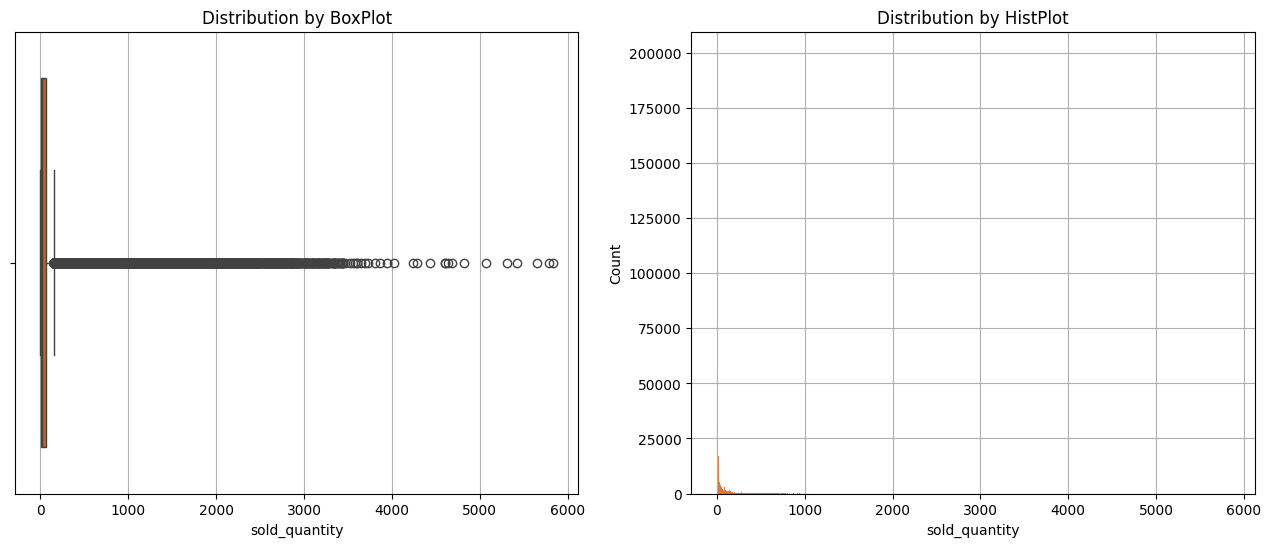

The Skew of Sold Quantity Data is: 6.02


In [150]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=fact_sales_monthly, x='sold_quantity', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=fact_sales_monthly, x='sold_quantity', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of Sold Quantity Data is: {round(fact_sales_monthly['sold_quantity'].skew(), 2)}")

##### Sold Quantity Outlier Data

In [151]:
# check the outliers, find out the upper bound and lower bound of the "sold quantity" column
bounds_sold_quantity = check_outlier(fact_sales_monthly, 'sold_quantity')
# print out the required information
print(f"lower bound is {bounds_sold_quantity['lower_bound'].values[0]}")
print(f"median is {bounds_sold_quantity['median'].values[0]}")
print(f"upper bound is {bounds_sold_quantity['upper_bound'].values[0]}")
print(f"percentage of sold quantity that are outliers is {bounds_sold_quantity['percent_outliers'].values[0]}%")

lower bound is -85.5
median is 14.0
upper bound is 150.5
percentage of sold quantity that are outliers is 12.22%


The data in the sold quantity column has a lower bound of -85.5, and an upper bound of 150.5

Based on the data distribution in the previous sold quantity column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper bound.

Let's move on

In [152]:
# filter rows with sold quantity greater than upper bound of sold quantity
outliers_sold_quantity = fact_sales_monthly[fact_sales_monthly['sold_quantity']>bounds_sold_quantity['upper_bound'].values[0]]
# Check how many rows are outliers
print(f"The total number of outliers is {outliers_sold_quantity.shape[0]}")

The total number of outliers is 118719


In [153]:
# Merge over_upper_sold_quantity with dim_product table to get more products details
outliers_sold_quantity_by_product = outliers_sold_quantity[
    ['date','product_code', 'customer_code', 'fiscal_year', 'sold_quantity']
    ].merge(dim_products, how='left', on='product_code', validate='many_to_one')
# count the outlier sold quantity values in each division
for i in outliers_sold_quantity_by_product['division'].unique():
    print("The number of Sold Quantity Outliers for Division ", i, "is ",
          str(outliers_sold_quantity_by_product[outliers_sold_quantity_by_product['division']==i]['division'].count())
          )

The number of Sold Quantity Outliers for Division  P & A is  89936
The number of Sold Quantity Outliers for Division  N & S is  28783


In [154]:
# count the outlier sold quantity values in each segment
for i in outliers_sold_quantity_by_product['segment'].unique():
    print("The number of Sold Quantity Outliers for Category ", i, "is ",
          str(outliers_sold_quantity_by_product[outliers_sold_quantity_by_product['segment']==i]['segment'].count())
          )

The number of Sold Quantity Outliers for Category  Peripherals is  9392
The number of Sold Quantity Outliers for Category  Accessories is  80544
The number of Sold Quantity Outliers for Category  Storage is  20895
The number of Sold Quantity Outliers for Category  Networking is  7888


In [155]:
# count the outlier sold quantity values in each category
for i in outliers_sold_quantity_by_product['category'].unique():
    print("The number of Sold Quantity Outliers for Category ", i, "is ",
          str(outliers_sold_quantity_by_product[outliers_sold_quantity_by_product['category']==i]['category'].count())
          )

The number of Sold Quantity Outliers for Category  Internal HDD is  2179
The number of Sold Quantity Outliers for Category  Graphic Card is  4100
The number of Sold Quantity Outliers for Category  Processors is  2324


The number of Sold Quantity Outliers for Category  MotherBoard is  789
The number of Sold Quantity Outliers for Category  Mouse is  43112
The number of Sold Quantity Outliers for Category  Keyboard is  37269
The number of Sold Quantity Outliers for Category  Batteries is  163
The number of Sold Quantity Outliers for Category  External Solid State Drives is  14978
The number of Sold Quantity Outliers for Category  USB Flash Drives is  5917
The number of Sold Quantity Outliers for Category  Wi fi extender is  7888


##### Explore "P & A" division Sold Quantity Outliers

In [156]:
# summarize data table
fact_sold_quantity = fact_sales_monthly.merge(dim_products, how='left', on='product_code', validate='many_to_one')
# filter rows with division is "P & A"
pna_df = fact_sold_quantity[fact_sold_quantity['division']=='P & A']
# statistics values
stats_pna = pna_df.groupby(['segment', 'category','product']).agg(
    min=('sold_quantity','min'),
    mean=('sold_quantity','mean'),
    median=('sold_quantity','median'),
    max=('sold_quantity','max')
    ).reset_index()
# check data after processing
display(stats_pna)

,segment,category,product,min,mean,median,max
0,Accessories,Batteries,AQ LION x1,1,12.101442,5.0,300
1,Accessories,Batteries,AQ LION x2,1,13.137897,5.0,295
2,Accessories,Batteries,AQ LION x3,1,13.083733,5.0,281
3,Accessories,Batteries,AQ Mx NB,1,15.815132,8.0,285
4,Accessories,Keyboard,AQ Gamers,1,148.698954,72.0,2755
5,Accessories,Keyboard,AQ Lite,1,148.250401,71.0,2965
6,Accessories,Keyboard,AQ Master wired x1,1,148.085129,71.0,2674
7,Accessories,Keyboard,AQ Master wireless x1,1,148.255384,72.0,2830
8,Accessories,Keyboard,AQ Maxima,1,154.595848,77.0,3021
9,Accessories,Keyboard,AQ Qwerty,2,183.971380,96.0,3070


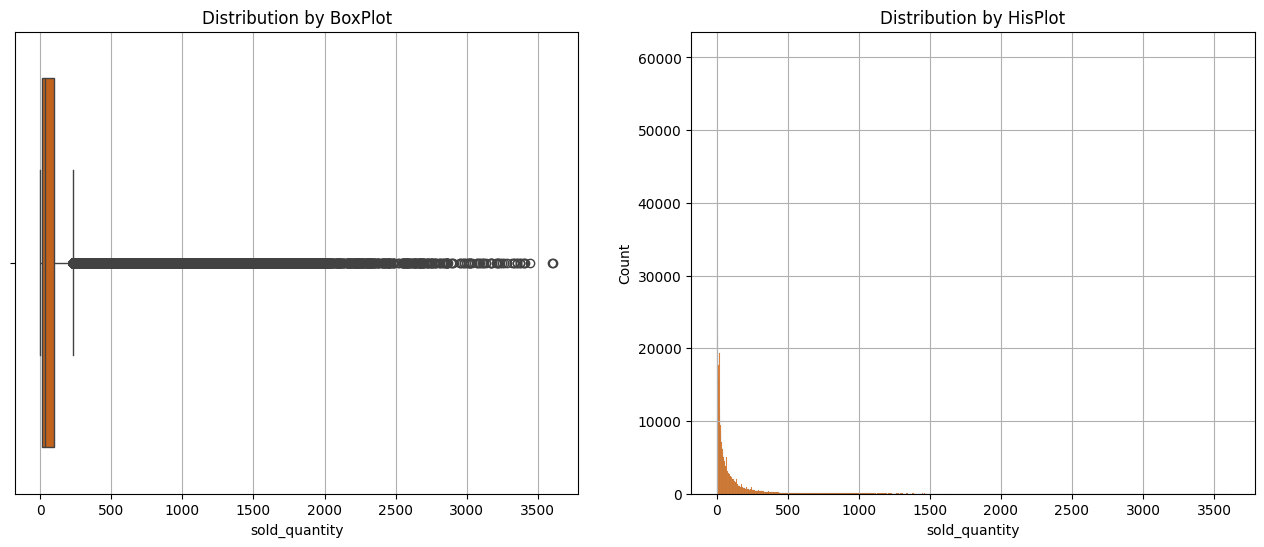

The Skew of Sold Quantity data is 4.93


In [157]:
# overview of outliers
# set the size of the figure
plt.figure(figsize=(16,6))
# first subplot for sold quantity outliers in "P & A" division
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=pna_df, x='sold_quantity', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplots for sold quantity outliers in "P&A" division
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=pna_df, x='sold_quantity', color='#DC5F00')
plt.title("Distribution by HisPlot")
# show the chart
plt.show()
# check the deviation of data in the "sold quantity" columns
print(f"The Skew of Sold Quantity data is {round(pna_df['sold_quantity'].skew(), 2)}")

In [158]:
# check the outliers, find out the upper bound and lower bound of the sales columns
bounds_sold_quantity_pna = check_outlier(pna_df, 'sold_quantity')

# print out the required information
print(f"Lower bound of P&A division is {bounds_sold_quantity_pna['lower_bound'].values[0]}")
print(f"Median point of P&A division is {bounds_sold_quantity_pna['median'].values[0]}")
print(f"Upper bound of P&A division is {bounds_sold_quantity_pna['upper_bound'].values[0]}")
print(f"The percentage of sold quantity that are outliers of P&A division is {bounds_sold_quantity_pna['percent_outliers'].values[0]}%")

Lower bound of P&A division is -120.5
Median point of P&A division is 31.0
Upper bound of P&A division is 227.5
The percentage of sold quantity that are outliers of P&A division is 10.52%


In [159]:
# filter rows with sold quantity greater than upper bound of sold quantity
outliers_pna = pna_df[pna_df['sold_quantity']>bounds_sold_quantity_pna['upper_bound'].values[0]]
# Check how many rows are outliers
print(f"The total number of outliers is {outliers_pna.shape[0]}")

The total number of outliers is 57887


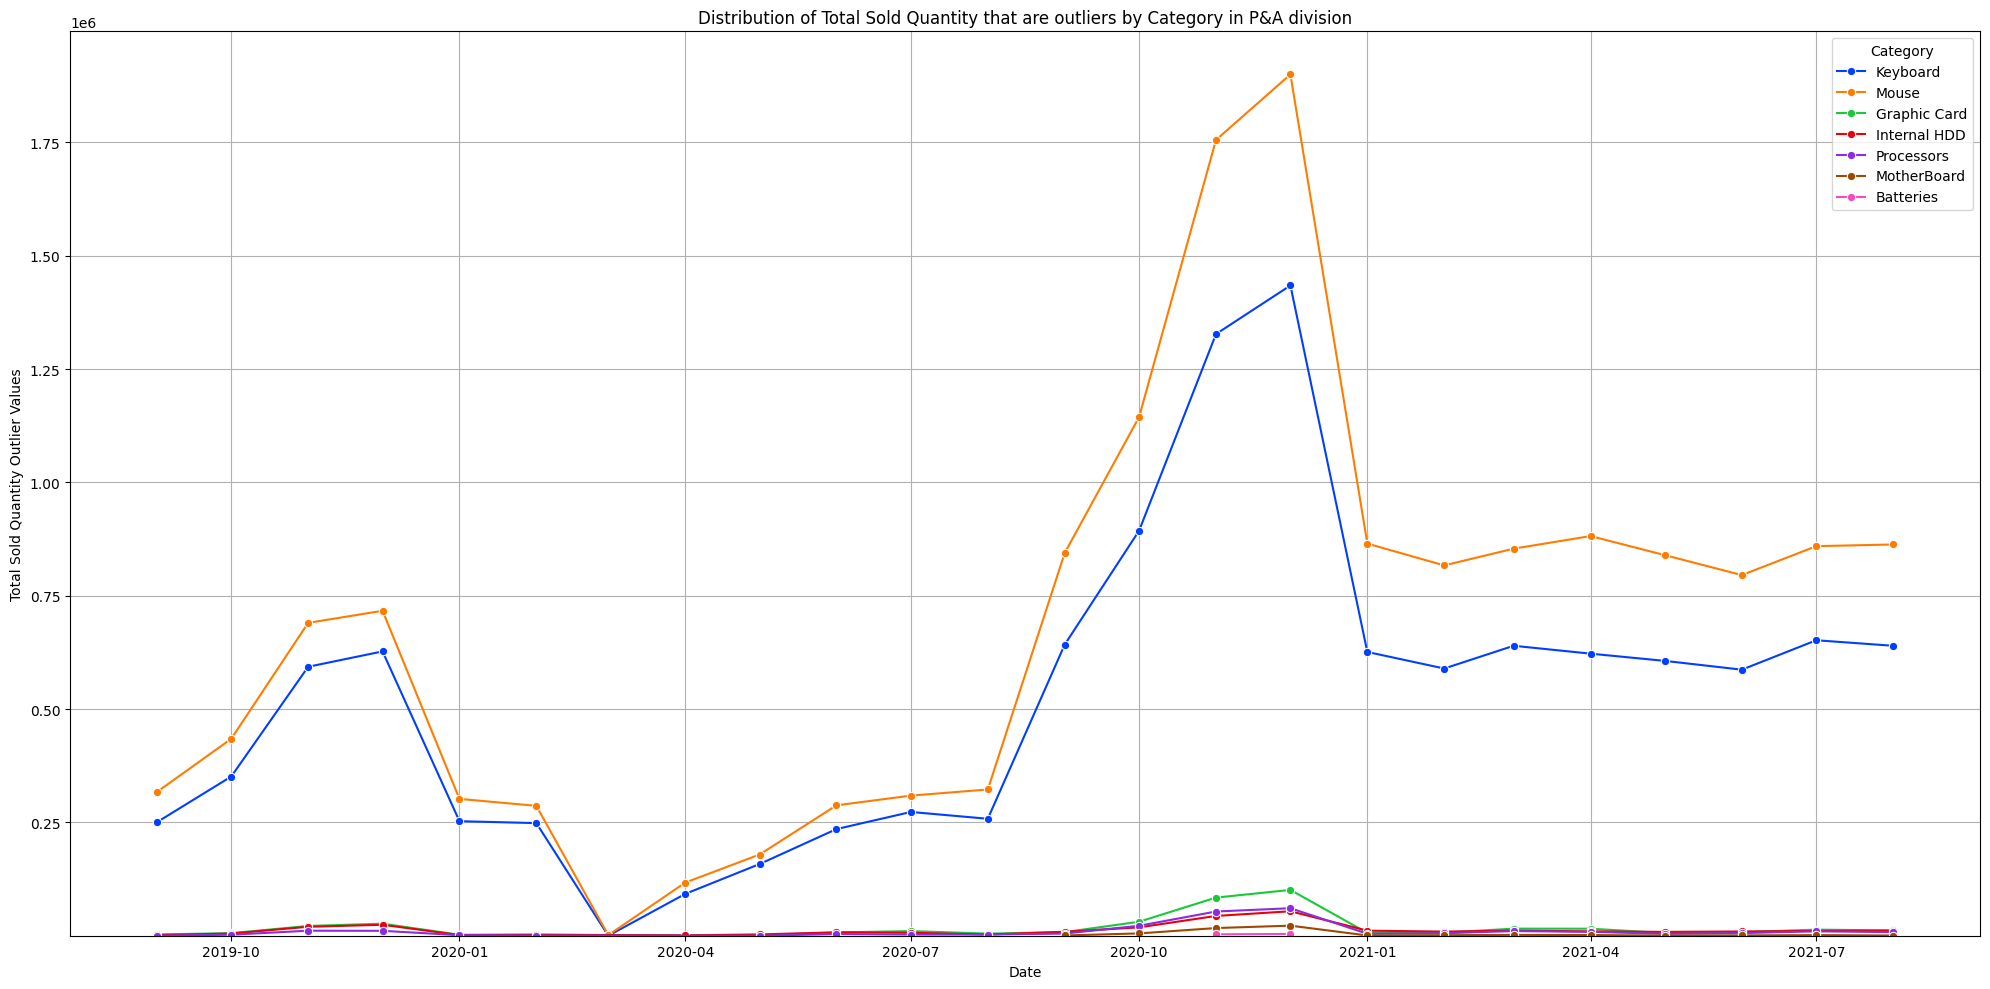

In [160]:
# filter sold quantity values by date, segment and category
outliers_pna_by_category = outliers_pna.groupby(['date','segment','category']).agg(total_sold_quantity=('sold_quantity','sum')).reset_index()
# change data type of a column
outliers_pna_by_category['date'] = pd.to_datetime(outliers_pna_by_category['date'])
# set the size of the figure
plt.figure(figsize=(20,10))
# plot the line chart for the column
ax = sns.lineplot(data=outliers_pna_by_category, x='date', y='total_sold_quantity', hue='category', marker='o', palette='bright')
# set the line chart for the column
plt.title("Distribution of Total Sold Quantity that are outliers by Category in P&A division")
plt.xlabel('Date')
plt.ylabel('Total Sold Quantity Outlier Values')
plt.ylim(outliers_pna_by_category['total_sold_quantity'].min()*0.95, outliers_pna_by_category['total_sold_quantity'].max()*1.05) # set x-ticks with labels
plt.grid()
# Display legend
plt.legend(title='Category')
# Adjust layout
plt.tight_layout()
# show the plot
plt.show()

##### Explore "N & S" division Sold Quantity Outliers

In [161]:
# filter rows with division is "N & S"
nns_df = fact_sold_quantity[fact_sold_quantity['division']=='N & S']
# statistics values
stats_nns = nns_df.groupby(['segment', 'category','product']).agg(
    min=('sold_quantity','min'),
    mean=('sold_quantity','mean'),
    median=('sold_quantity','median'),
    max=('sold_quantity','max')
    ).reset_index()
# check data after processing
display(stats_nns)

,segment,category,product,min,mean,median,max
0,Networking,Wi fi extender,AQ Wi Power Dx1,1,150.940627,72.0,3282
1,Networking,Wi fi extender,AQ Wi Power Dx2,1,149.919563,73.0,3323
2,Networking,Wi fi extender,AQ Wi Power Dx3,3,152.277158,79.0,2492
3,Storage,External Solid State Drives,AQ Clx1,1,193.158966,93.5,3698
4,Storage,External Solid State Drives,AQ Clx2,1,200.805404,102.0,3805
5,Storage,External Solid State Drives,AQ Clx3,5,217.172780,115.0,2935
6,Storage,External Solid State Drives,AQ Digit SSD,1,191.937272,94.0,3441
7,Storage,External Solid State Drives,AQ Neuer SSD,1,191.065310,92.0,3727
8,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,1,308.714248,149.0,5313
9,Storage,USB Flash Drives,AQ Pen Drive DRC,1,331.517957,169.0,5832


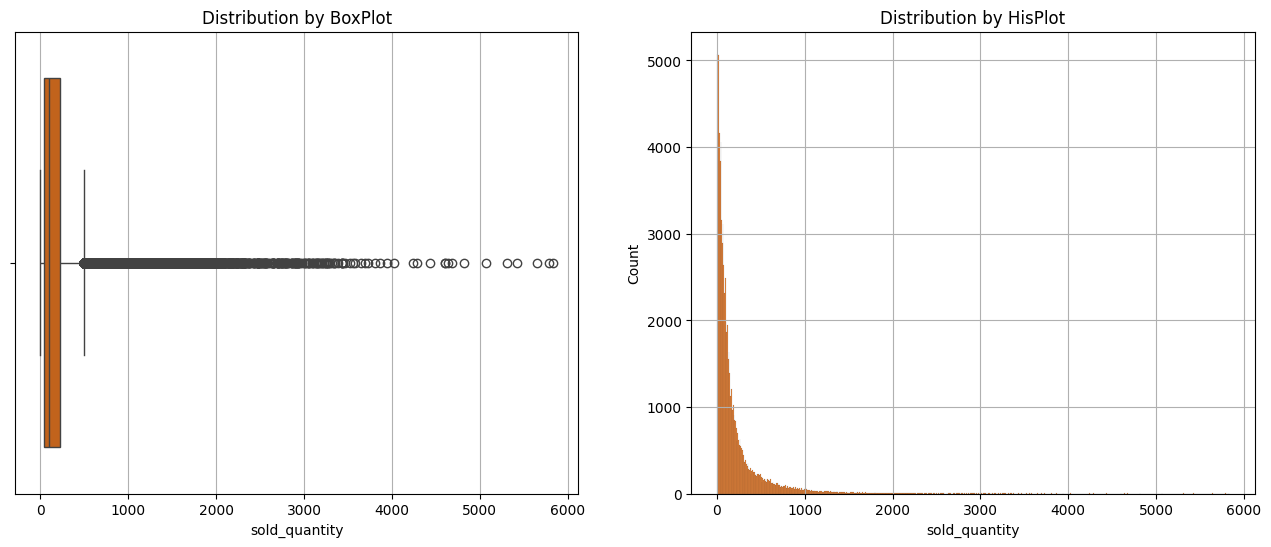

The Skew of Sold Quantity data is 4.23


In [162]:
# overview of outliers
# set the size of the figure
plt.figure(figsize=(16,6))
# first subplot for sold quantity outliers in "N & S" division
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=nns_df, x='sold_quantity', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplots for sold quantity outliers in "N & S" division
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=nns_df, x='sold_quantity', color='#DC5F00')
plt.title("Distribution by HisPlot")
# show the chart
plt.show()
# check the deviation of data in the "sold quantity" columns
print(f"The Skew of Sold Quantity data is {round(nns_df['sold_quantity'].skew(), 2)}")

In [163]:
# check the outliers, find out the upper bound and lower bound of the sales columns
bounds_sold_quantity_nns = check_outlier(nns_df, 'sold_quantity')
# print out the required information
print(f"Lower bound of N&S division is {bounds_sold_quantity_nns['lower_bound'].values[0]}")
print(f"Median point of N&S division is {bounds_sold_quantity_nns['median'].values[0]}")
print(f"Upper bound of N&S division is {bounds_sold_quantity_nns['upper_bound'].values[0]}")
print(f"The percentage of sold quantity that are outliers of N&S division is {bounds_sold_quantity_nns['percent_outliers'].values[0]}%")

Lower bound of N&S division is -235.0
Median point of N&S division is 93.0
Upper bound of N&S division is 493.0
The percentage of sold quantity that are outliers of N&S division is 10.15%


In [164]:
# filter rows with sold quantity greater than upper bound of sold quantity
outliers_nns = nns_df[nns_df['sold_quantity']>bounds_sold_quantity_nns['upper_bound'].values[0]]
# Check how many rows are outliers
print(f"The total number of outliers is {outliers_nns.shape[0]}")

The total number of outliers is 8382


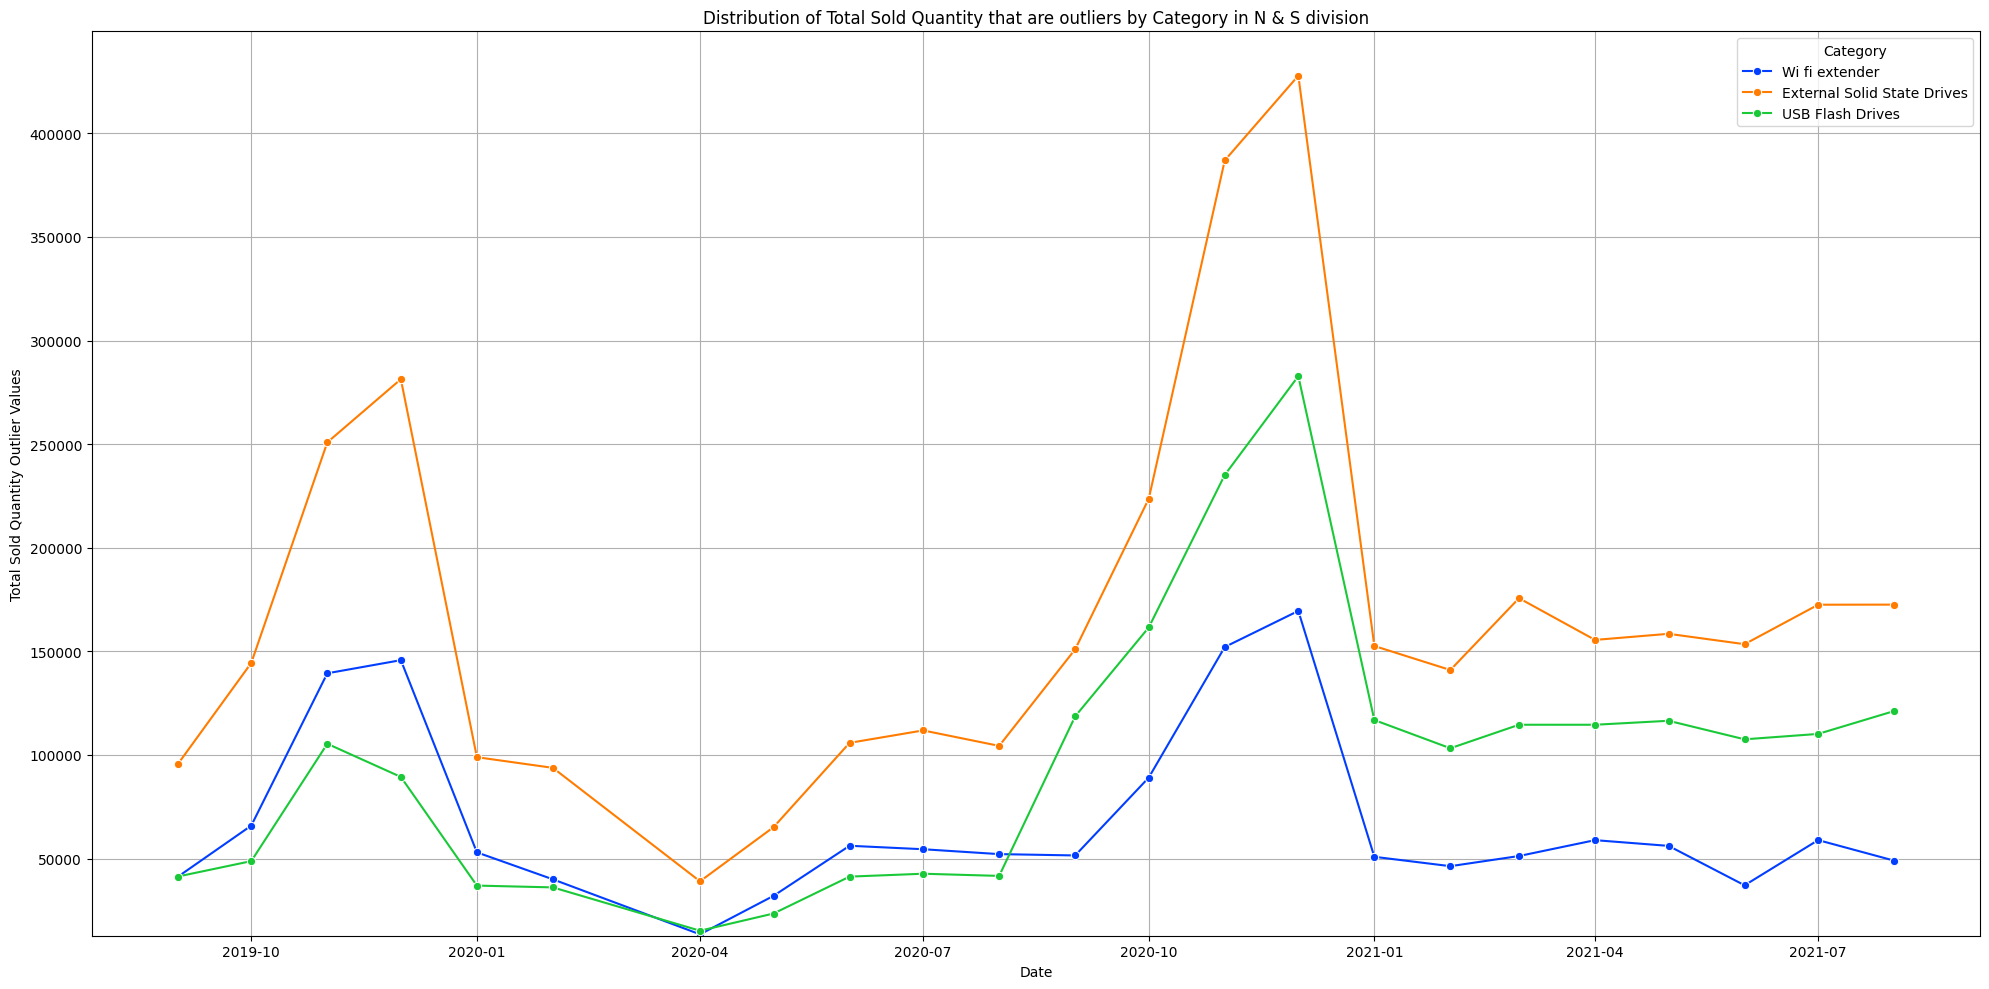

In [165]:
# filter sold quantity values by date, segment and category
outliers_nns_by_category = outliers_nns.groupby(['date','segment','category']).agg(total_sold_quantity=('sold_quantity','sum')).reset_index()
# change data type of a column
outliers_nns_by_category['date'] = pd.to_datetime(outliers_nns_by_category['date'])
# set the size of the figure
plt.figure(figsize=(20,10))
# plot the line chart for the column
ax = sns.lineplot(data=outliers_nns_by_category, x='date', y='total_sold_quantity', hue='category', marker='o', palette='bright')
# set the line chart for the column
plt.title("Distribution of Total Sold Quantity that are outliers by Category in N & S division")
plt.xlabel('Date')
plt.ylabel('Total Sold Quantity Outlier Values')
plt.ylim(outliers_nns_by_category['total_sold_quantity'].min()*0.95, outliers_nns_by_category['total_sold_quantity'].max()*1.05) # set x-ticks with labels
plt.grid()
# Display legend
plt.legend(title='Category')
# Adjust layout
plt.tight_layout()
# show the plot
plt.show()

## Export Processed Data

In [166]:
# dim customers
dim_customers.to_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/dim_customers.csv", index=False, encoding='ISO-8859-1')
# dim products
dim_products.to_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/dim_products.csv", index=False, encoding='ISO-8859-1')
# fact_gross_price
fact_gross_price.to_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_gross_price.csv", index=False, encoding='ISO-8859-1')
# fact_manufacturing_cost
fact_manufacturing_cost.to_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_manufacturing_cost.csv", index=False, encoding='ISO-8859-1')
# discount data
fact_pre_invoice_deduction.to_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_pre_invoice_deduction.csv", index=False, encoding='ISO-8859-1')
# sales data
fact_sales_monthly.to_csv("C:/Users/PC/Downloads/Atliq_Hardwares-Provide_Insights_to_Management_in_Consumer_Goods_Domain/data/processed_data/fact_sales_monthly.csv", index=False, encoding='ISO-8859-1')

# Next Steps